In [5]:
# block 1: import of all useful libraries and the data file used
%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import datetime as dt
data = sio.loadmat('/media/z3525831/Transcend/UNSW/DATA ADCP/CH100_nostructure.mat')

In [6]:
# block 2: creation of different variables uses 
# Assignment for each variable of data coming from the file import (data of the type ndarrays)
data_U = data['U']
data_V = data['V']
data_depthV = data['depthV']
data_t = data['t']
data_timeDV = data['timeDV']                                           
data_u25 = data['u25']                            
data_u55 = data['u55']
data_u90 = data['u90']
data_v25 = data['v25']
data_v55 = data['v55']
data_v90 = data['v90']

In [7]:
# block 3: Conversion of Matlab time data to 'classic python time data
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))                       
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366) 
    return day + dayfrac
t = data_t[0,:]

In [8]:
# block 4: Creation of Power density variable and time
# Convert Matlab variable "t" into list of python datetime objects
# So P = 1/2 * 1025 * 4 * Vf^3
# Converting unit W to kW for power
py_t = [matlab2datetime(tval) for tval in t]
V = (data_U*data_U) + (data_V*data_V)
Vf = np.sqrt(V)                        
P = 0.5 * 1025 * 4 * (Vf*Vf*Vf)     
Pf = P/1000

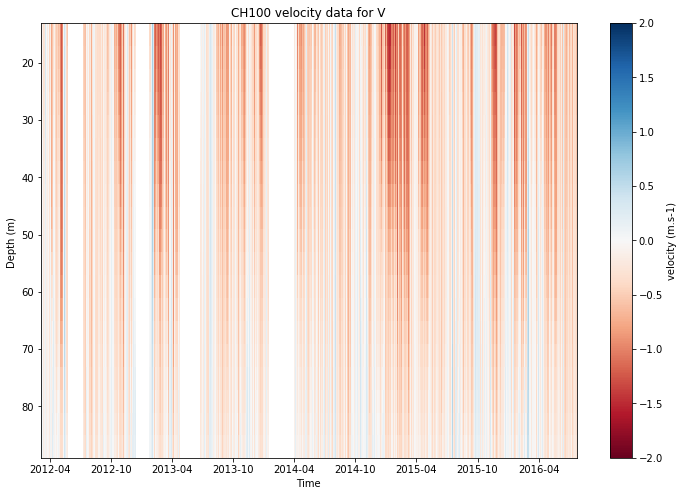

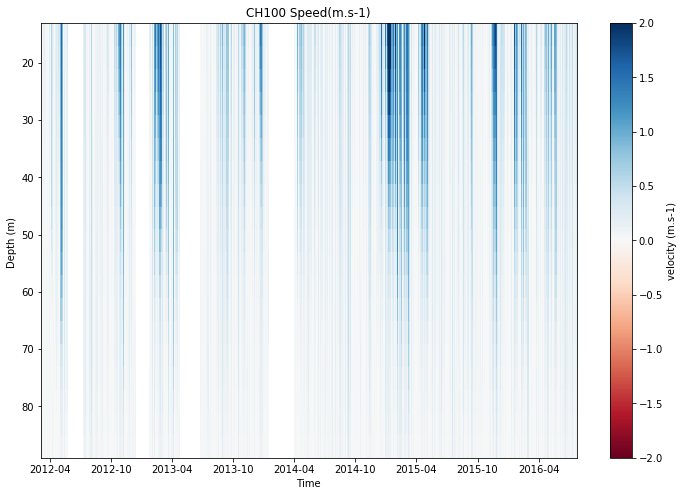

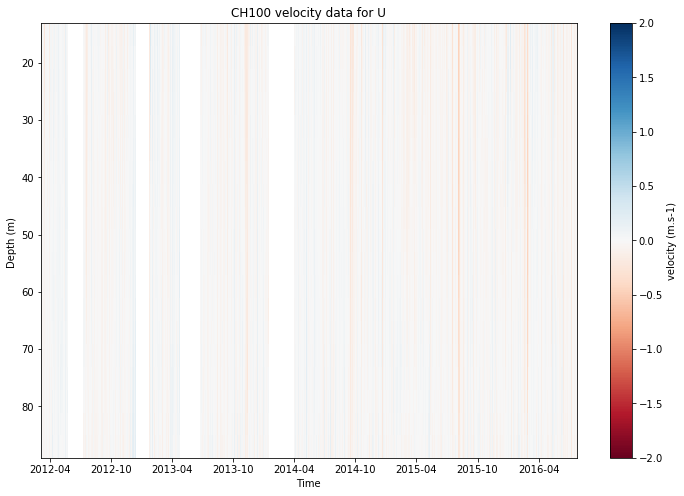

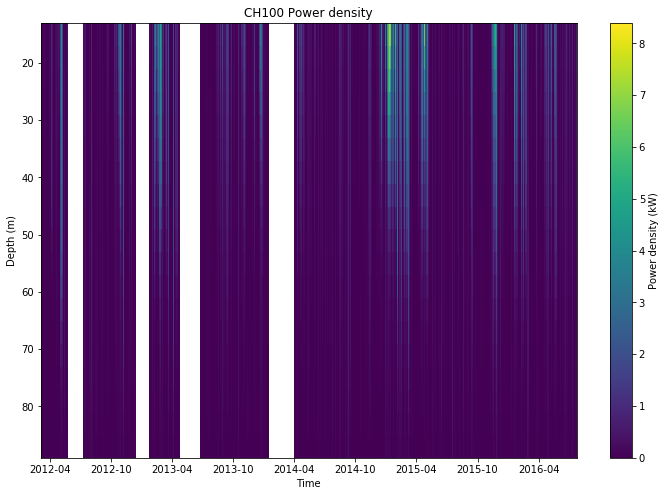

In [10]:
# block 8: Creation of the different graph
plt.rcParams['figure.figsize'] = (12,8)
t = data_t[0,:]                                
plt.xlabel("Time")             
plt.ylabel("Depth (m) ")         
plt.gca().invert_yaxis()        
plt.title("CH100 velocity data for V")
plt.pcolor(py_t,data_depthV[:,0],data_V, cmap='RdBu', vmin=-2, vmax=2)
clb = plt.colorbar()                 
clb.set_label('velocity (m.s-1)')    
plt.show()  

plt.rcParams['figure.figsize'] = (12,8)
t = data_t[0,:]                                
plt.xlabel("Time")             
plt.ylabel("Depth (m) ")         
plt.gca().invert_yaxis()         
plt.title("CH100 Speed(m.s-1)")
plt.pcolor(py_t,data_depthV[:,0],V, cmap='RdBu', vmin=-2, vmax=2) 
clb = plt.colorbar()                 
clb.set_label('velocity (m.s-1)')   
plt.show()  

plt.rcParams['figure.figsize'] = (12,8)
t = data_t[0,:]                                
plt.xlabel("Time")             
plt.ylabel("Depth (m) ")
plt.gca().invert_yaxis()
plt.title("CH100 velocity data for U")
plt.pcolor(py_t,data_depthV[:,0],data_U, cmap='RdBu', vmin=-2, vmax=2)
clb = plt.colorbar()
clb.set_label('velocity (m.s-1)')
plt.show() 

plt.rcParams['figure.figsize'] = (12,8)
t = data_t[0,:]                                            
plt.xlabel("Time")               
plt.ylabel("Depth (m)")
plt.gca().invert_yaxis()       
plt.title("CH100 Power density")
plt.pcolor(py_t,data_depthV[:,0],Pf)    
clb = plt.colorbar()
clb.set_label('Power density (kW)')     
plt.show()